#### [ 남북한발전전력량 분석 및 시각화 ]
- 데이터셋 : 남북한발전전력량.xlsx
- 데이터 구성
    -1990년 ~ 2016년 까지 수력,화력,원자력,신재생 에너지 데이터
- 분석주제 : 남한과 북한의 에너지 데이터 변화 분석


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import df_dfutil as util



In [2]:
# 데이터 준비하기
FILEDATA=r'C:\Users\KDP-26\Documents\datafolder\남북한발전전력량.xlsx'
datadf=pd.read_excel(FILEDATA)

In [3]:
datadf

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# 데이터 확인
datadf.info()
print(datadf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [5]:
# 데이터 전처리 및 가공하기
# 멀티 인덱싱 하기 -> 컬럼을 행인덱스로 설정하기
# 1) Nan 컬럼에 대한 처리
# 2) 2개의 컬럼을 인덱스로 설정


In [6]:
# 1) NaN컬럼에 대한 처리하기
datadf.columns[0]

'전력량 (억㎾h)'

In [7]:
datadf[datadf.columns[0]]

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [8]:
datadf[datadf.columns[0]].ffill(inplace=True)
for a in datadf.index:
    for b in datadf.columns:
        if datadf.iloc[a][b]=='-':
            datadf.iloc[a][b]=0
datadf

C:\Users\KDP-26\AppData\Local\Temp\ipykernel_17732\2567330118.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  datadf.iloc[a][b]=0


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
datadf

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 행인덱스로 사용할 컬럼명 추출
datadf.columns[:2].to_list()

['전력량 (억㎾h)', '발전 전력별']

In [11]:
datadf.set_index(datadf.columns[:2].to_list(), inplace=True)
datadf.head(2)

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  

[2 rows x 27 columns]

In [12]:
# 행인덱스 names 속성 수정
idx_names=datadf.index.names
print(idx_names)

datadf.index.set_names({idx_names[0]:'구분', idx_names[1]:'전력'}, inplace=True)
print(datadf.head())

['전력량 (억㎾h)', '발전 전력별']
        1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     0     0     0     0     0     0     0     0     0     0  ...     0   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     0     0     0     0

In [13]:
# 데이터 전처리 및 가공
# 데이터 NA 치환 -> 0

# datadf.replace('0', pd.NA, inplace=True)
# datadf


In [14]:
datadf.isna().T.sum()

구분  전력 
남한  합계     0
    수력     0
    화력     0
    원자력    0
    신재생    0
북한  합계     0
    수력     0
    화력     0
    원자력    0
dtype: int64

In [15]:
# boject 타입을 int16 형변환하기
datadf=datadf.astype('int16')
datadf.dtypes

1990    int16
1991    int16
1992    int16
1993    int16
1994    int16
1995    int16
1996    int16
1997    int16
1998    int16
1999    int16
2000    int16
2001    int16
2002    int16
2003    int16
2004    int16
2005    int16
2006    int16
2007    int16
2008    int16
2009    int16
2010    int16
2011    int16
2012    int16
2013    int16
2014    int16
2015    int16
2016    int16
dtype: object

In [25]:
datadf

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     0     0     0     0     0     0     0     0     0     0  ...     0   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력     0     0     0     0     0     0     0     0     0     0  ...     0   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     0     0     0     0    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력     0     0     0     0     0     0     0     0     0  

[9 rows x 27 columns]

In [16]:
from matplotlib import font_manager as fm
from matplotlib import rc

# 한글 폰트 설정하기 -> font 메니저 모듈 사용
FONT_FILE=r'C:\Windows\Fonts\H2MJRE.TTF'

#폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)


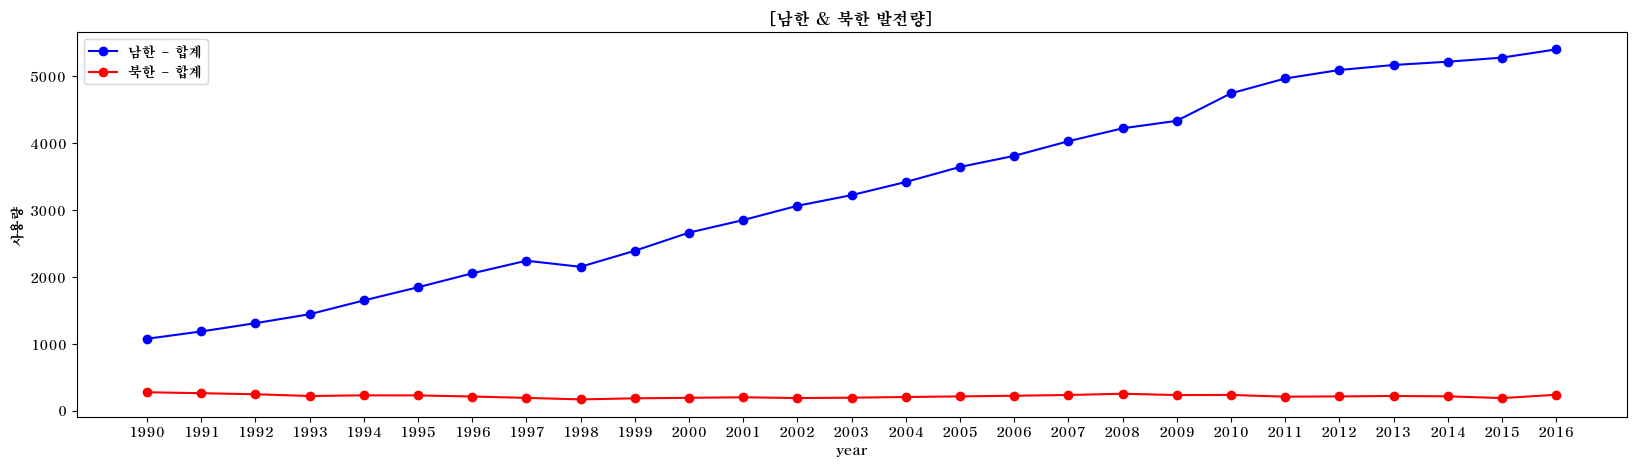

In [17]:
plt.figure(figsize=[20,5])
plt.plot(datadf.loc[('남한', '합계')],'bo-', label='남한 - 합계')
plt.plot(datadf.loc[('북한', '합계')],'ro-', label='북한 - 합계')
plt.title('[남한 & 북한 발전량]', )
plt.ylabel('사용량')
plt.xlabel('year')
plt.legend()
plt.show()

In [18]:
def drawlinegrape(title, columns, labels, xlabel, ylabel):
    for col in columns:
        plt.plot(datadf.loc[col], label=f'{col}')
    
    plt.title(f'---[{title}]---' )
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.legend(labels)
    plt.show()

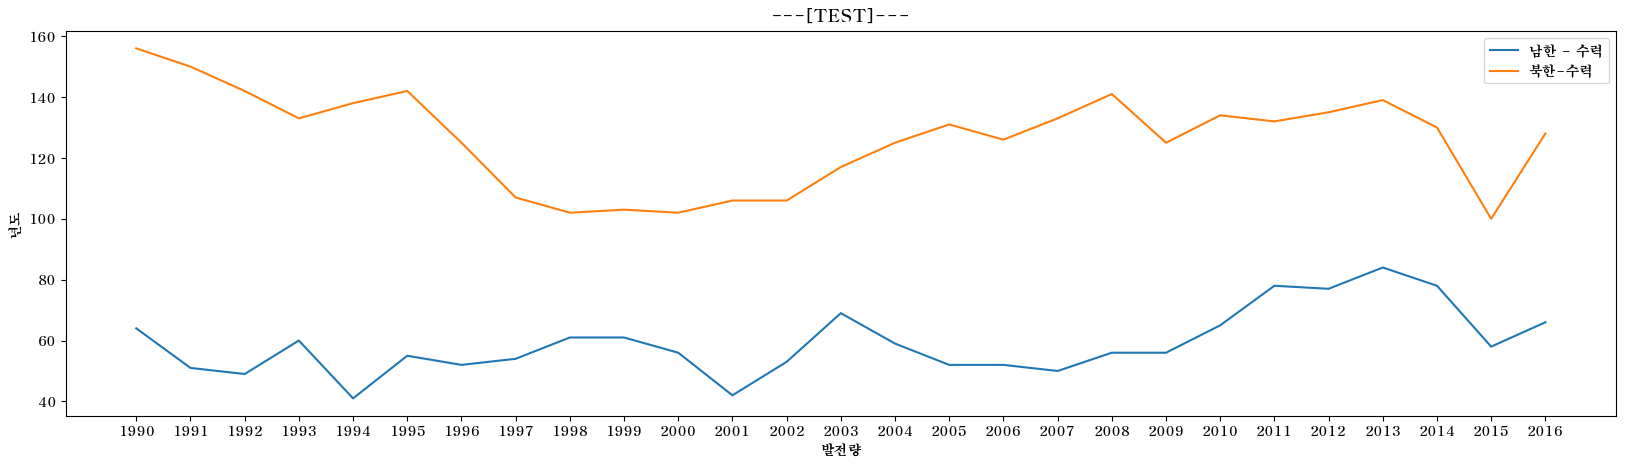

In [19]:
plt.figure(figsize=[20,5])
drawlinegrape('TEST', [('남한', '수력'), ('북한','수력')],
              ['남한 - 수력', '북한-수력'],
              '년도', '발전량')

In [20]:
### 하나의 figure에 여러개 그래프 넣기


In [21]:
# figure 객체 생성
# - 생성된 figure 객체 안에 subplot 객체 생성
#   *그래프를 표시 방식을 정해야함 : 가로, 세로 몇개 그래프 넣을 지 지정
# - subplot에 그래프를 넣기

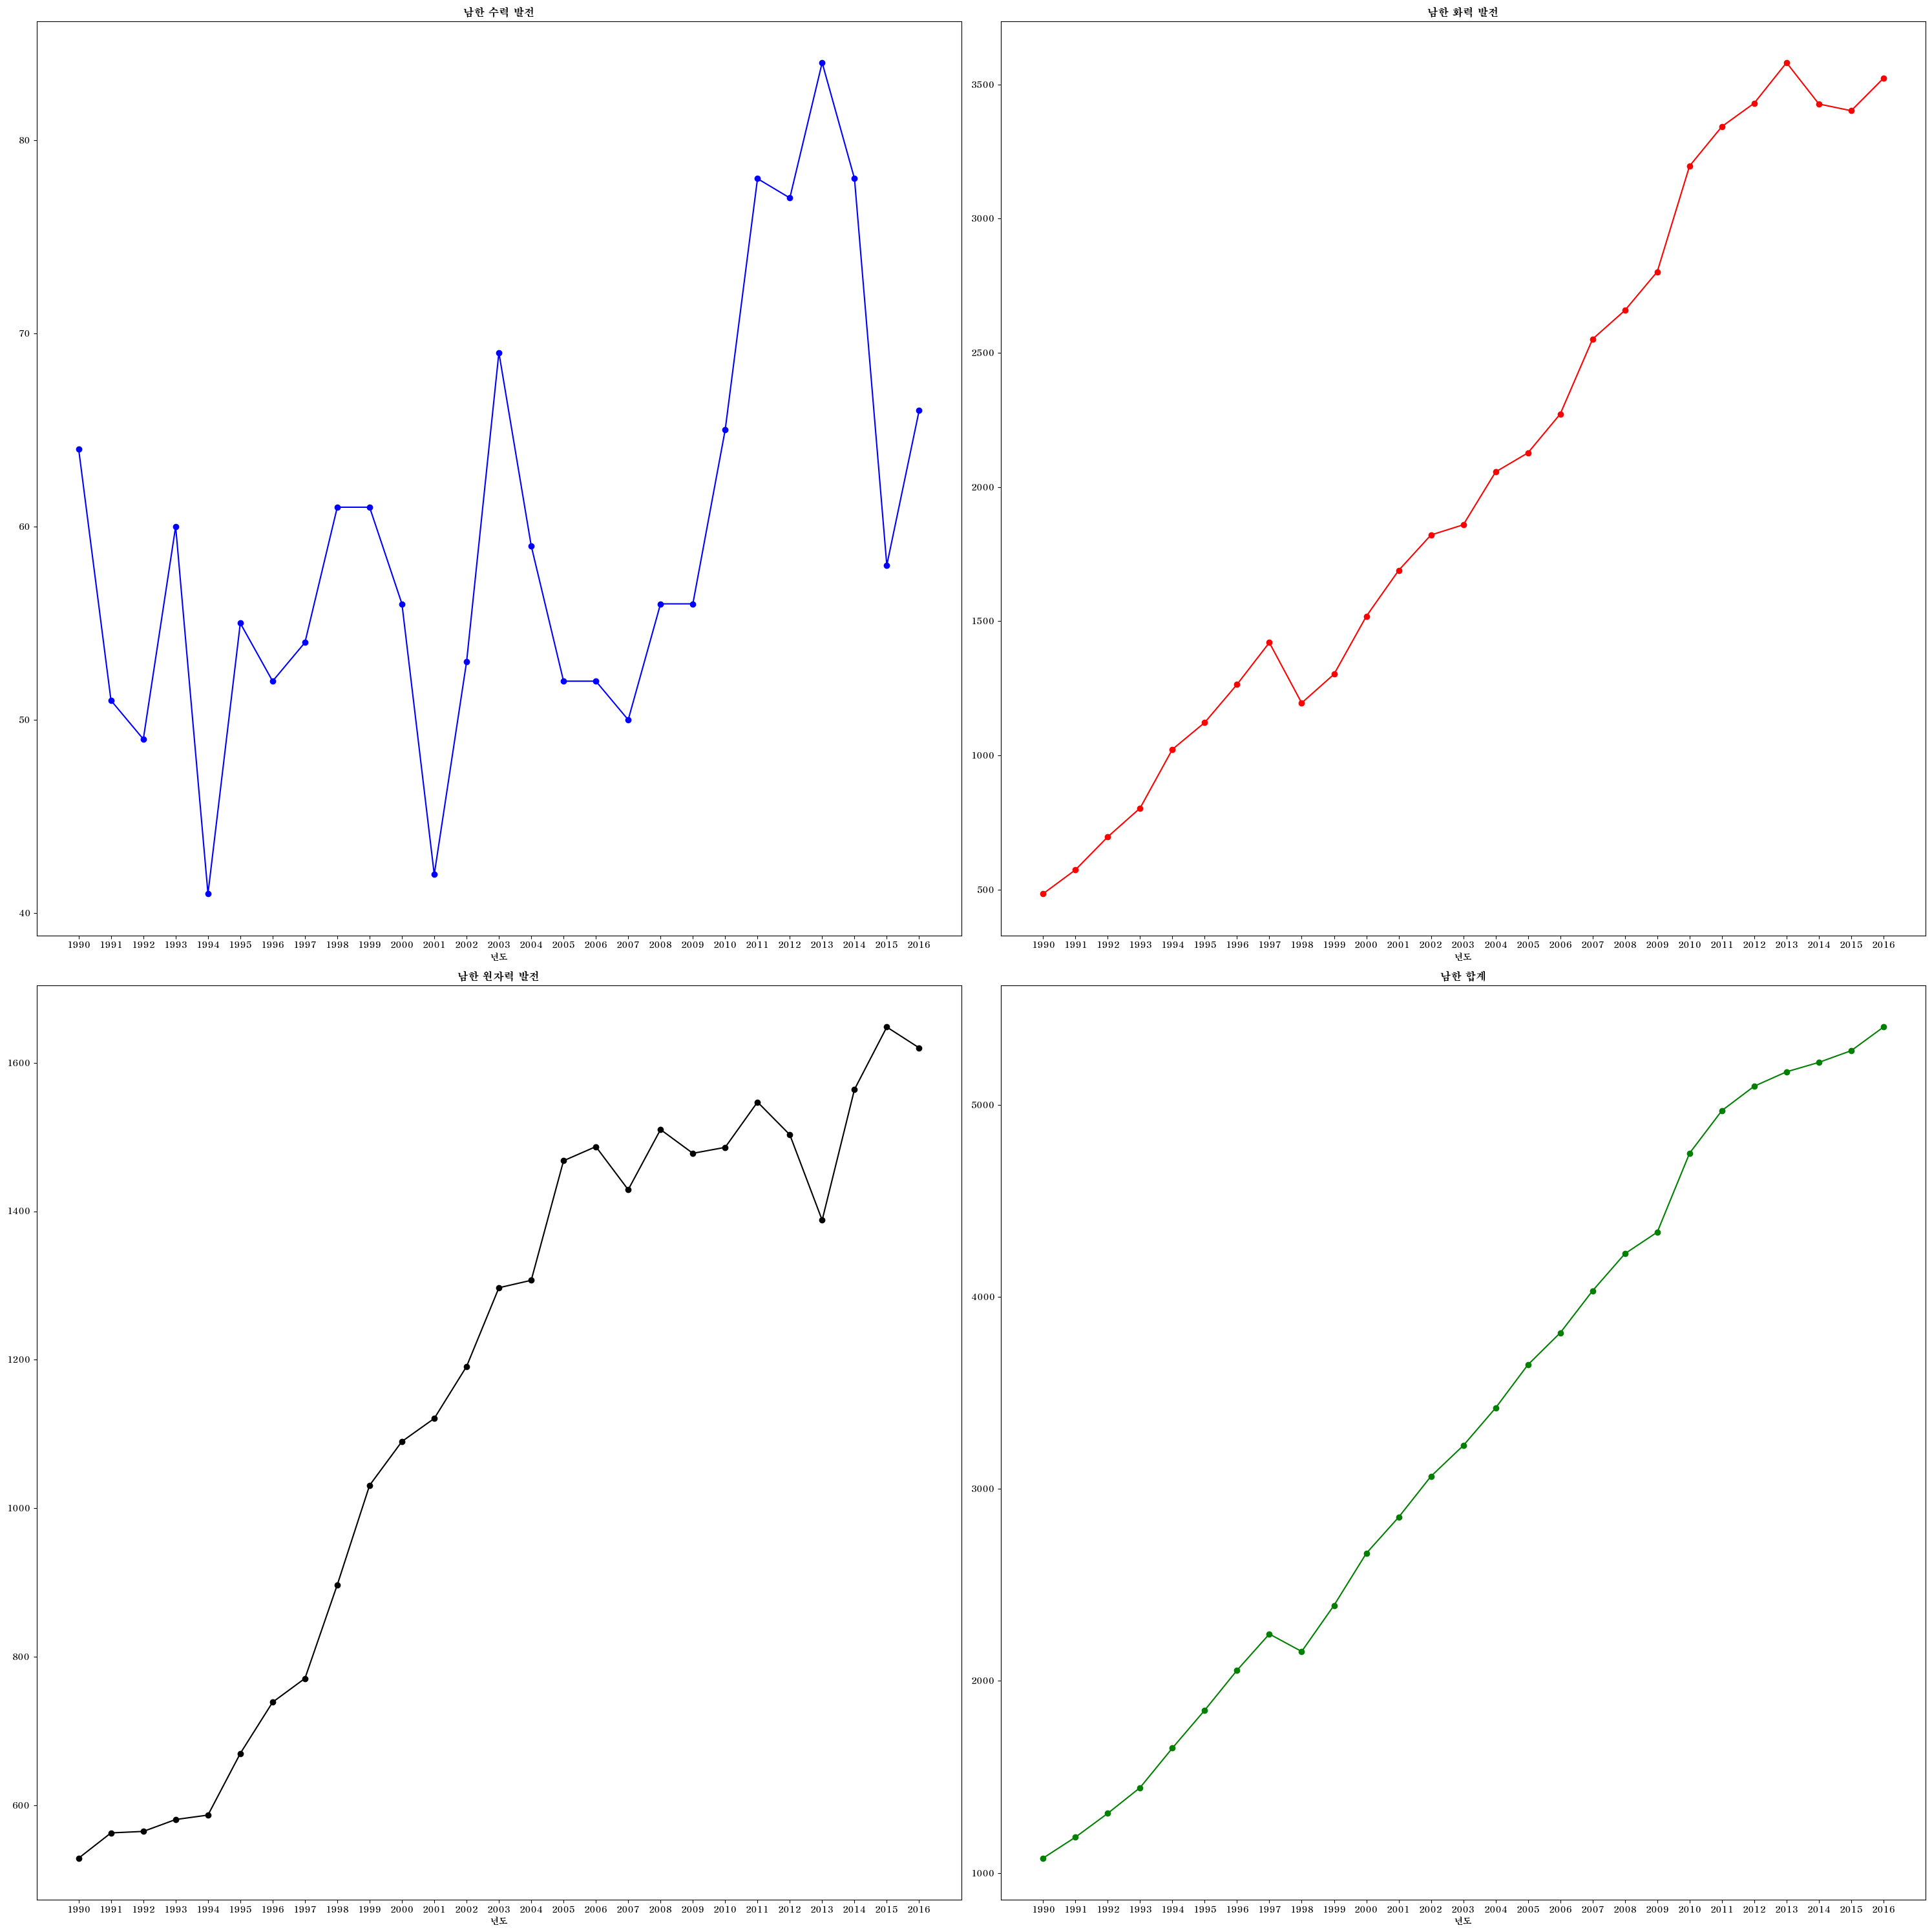

In [22]:
# -> 하나의 Figure에서 수력/화력/원자력/합계 그래프 넣기

fig=plt.figure(figsize=(30,30))

# - add_subplot(행수, 열수, 번호)
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

# - 각 subplot에 그래프 넣기
ax1.plot(datadf.loc[('남한', '수력')],'bo-', label='남한 - 수력')
ax2.plot(datadf.loc[('남한', '화력')],'ro-', label='남한 - 화력')
ax3.plot(datadf.loc[('남한', '원자력')],'ko-', label='남한 - 원자력')
ax4.plot(datadf.loc[('남한', '합계')],'go-', label='남한 - 합계')

# - 각 subplot별로 설정
ax1.set_title('남한 수력 발전')
ax1.set_xlabel('년도')
ax2.set_title('남한 화력 발전')
ax2.set_xlabel('년도')
ax3.set_title('남한 원자력 발전')
ax3.set_xlabel('년도')
ax4.set_title('남한 합계')
ax4.set_xlabel('년도')


#화면출력
plt.tight_layout()
plt.show()

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]] [<Axes: > <Axes: > <Axes: >] Axes(0.398529,0.11;0.227941x0.35)


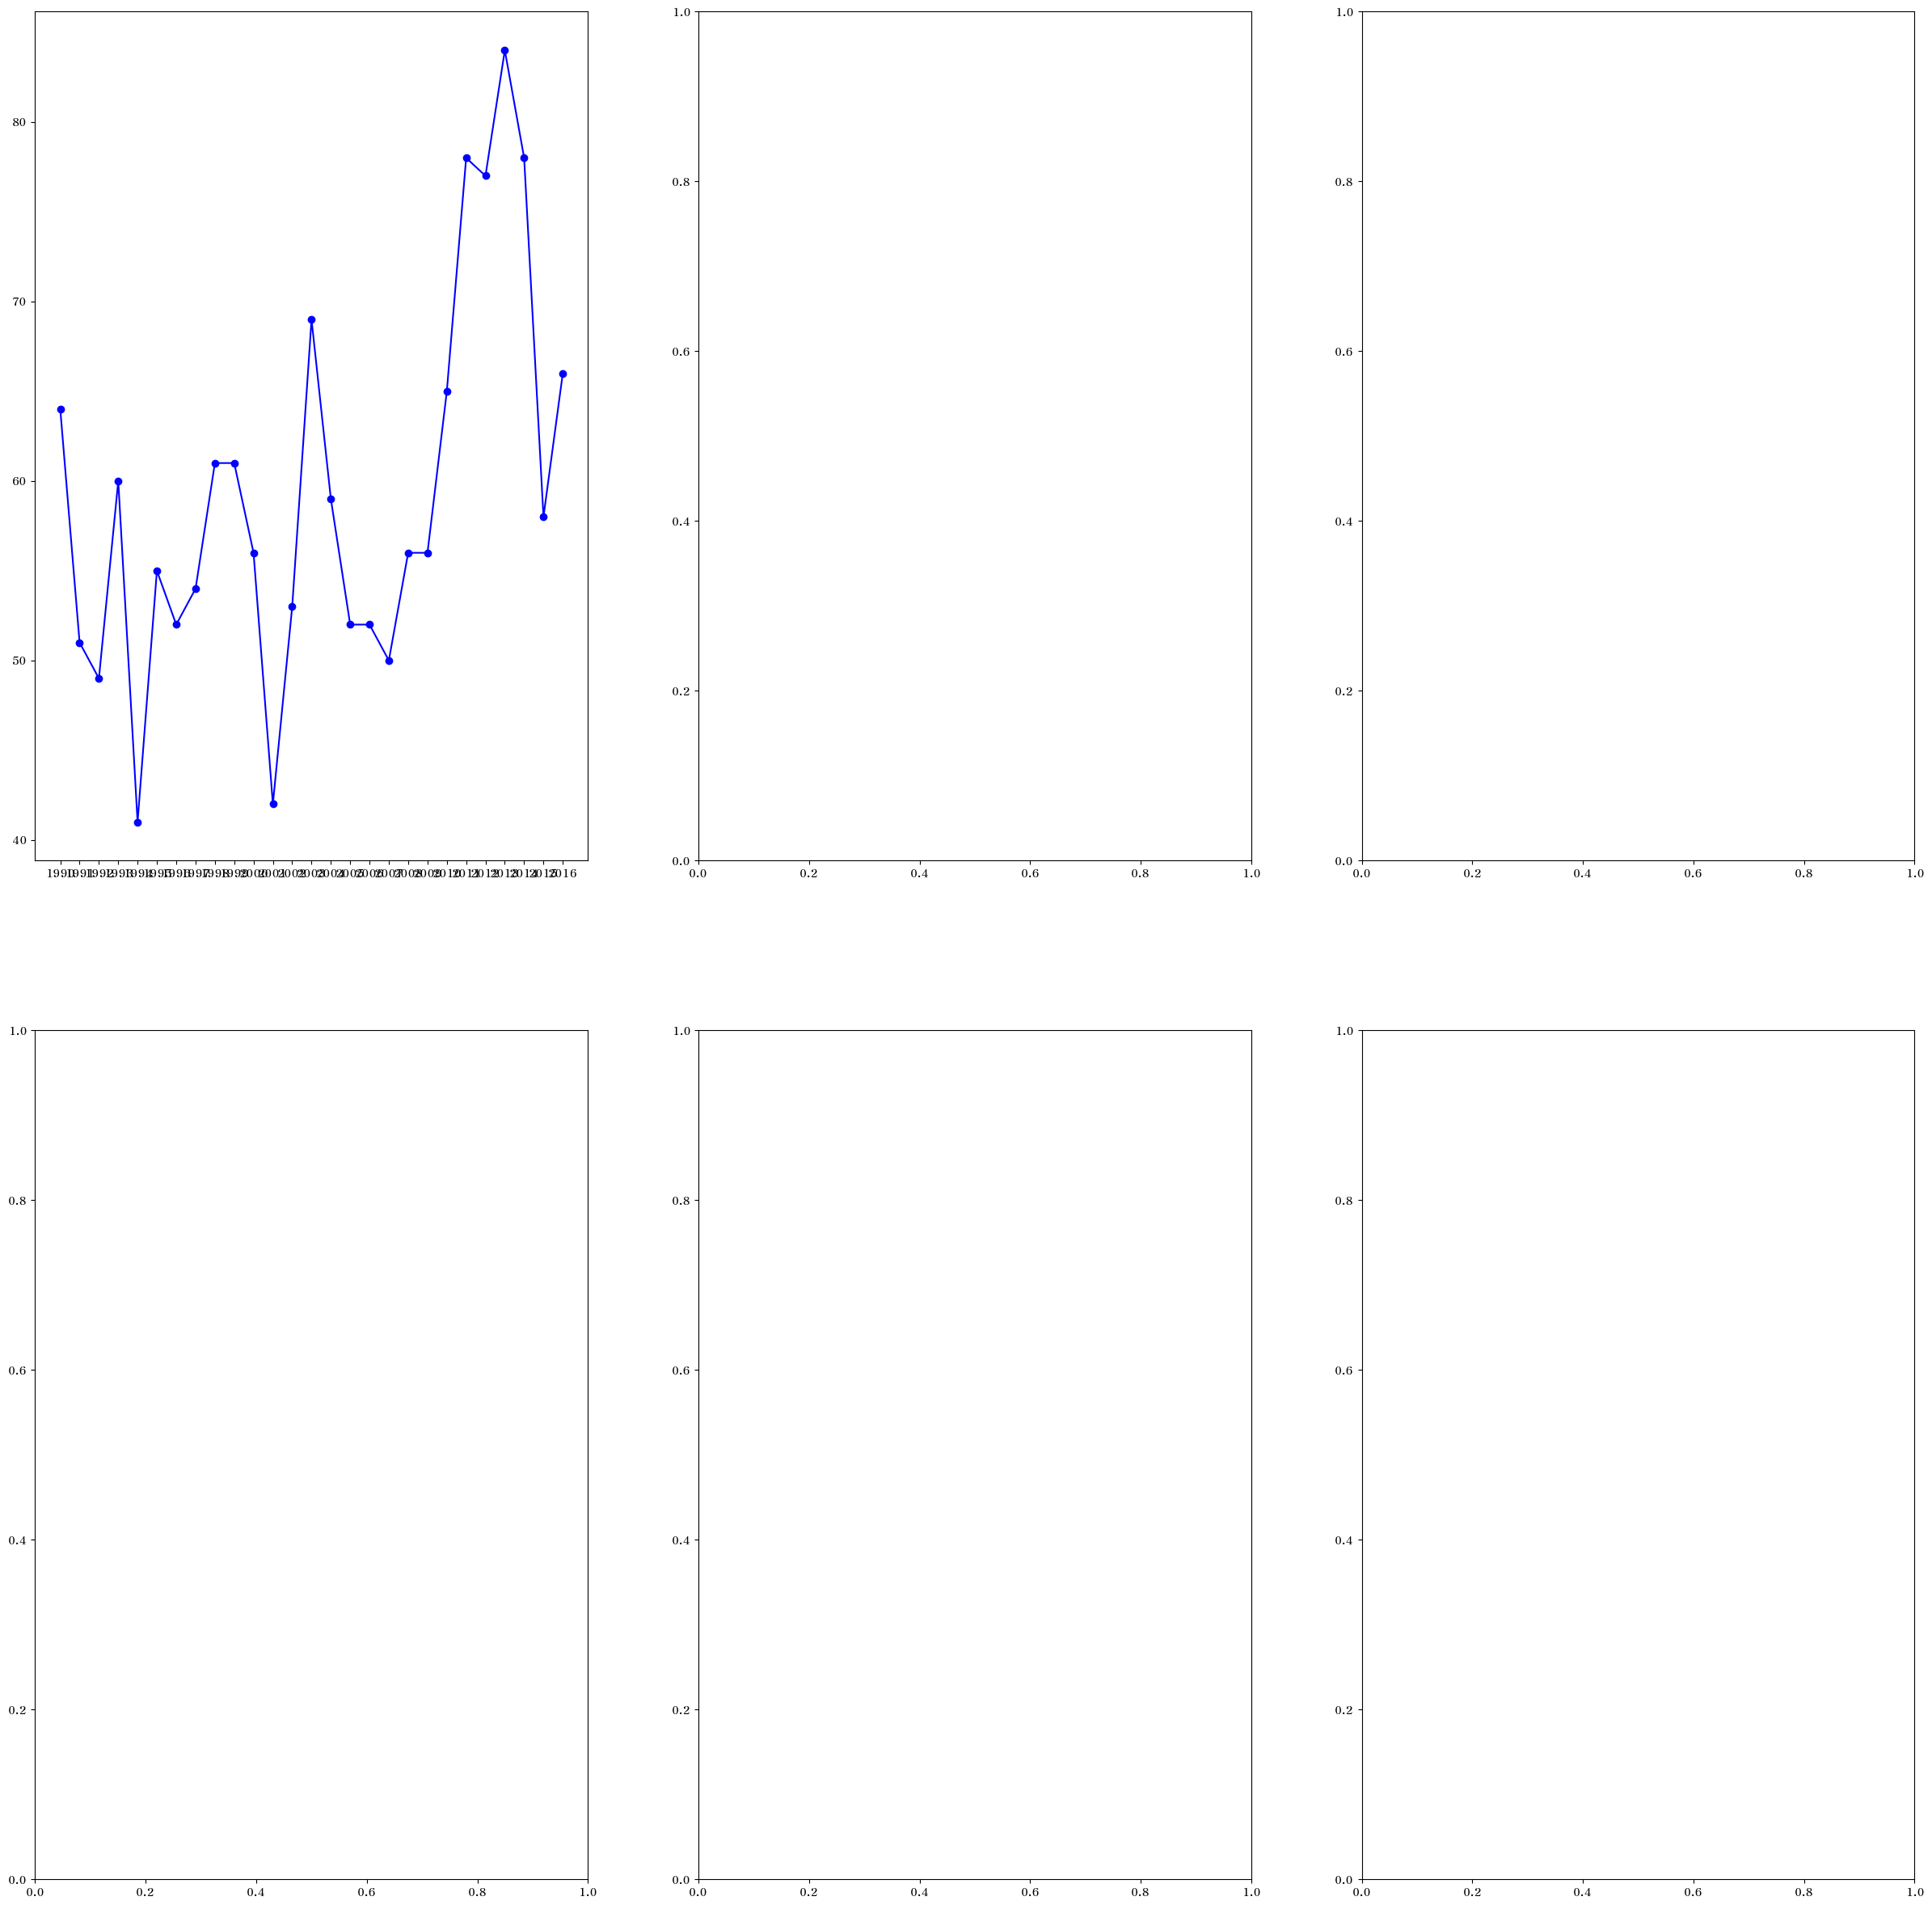

In [23]:

fig=plt.figure(figsize=(30,30))
# subplot 객체 생성 -> subplots() -> aexes 객체를 배열에 담아서 반환
#                                 -> 행단위로 axes 담아서 반환
axes=fig.subplots(2,3) # 한번에 빈 그래프 2행 2열 = 4개 만들기
print(axes, axes[0], axes[1][1])

# axes=fig.subplots(1,4)
# print(axes)

# subplot에 그래프 넣기
axes[0,0].plot(datadf.loc[('남한', '수력')],'bo-', label='남한 - 수력')

# 화면에 띄우기
plt.show()

[<Axes: > <Axes: > <Axes: > <Axes: >]


Text(0.5, 0.98, '남한의 에너지 발전량 변화 동향')

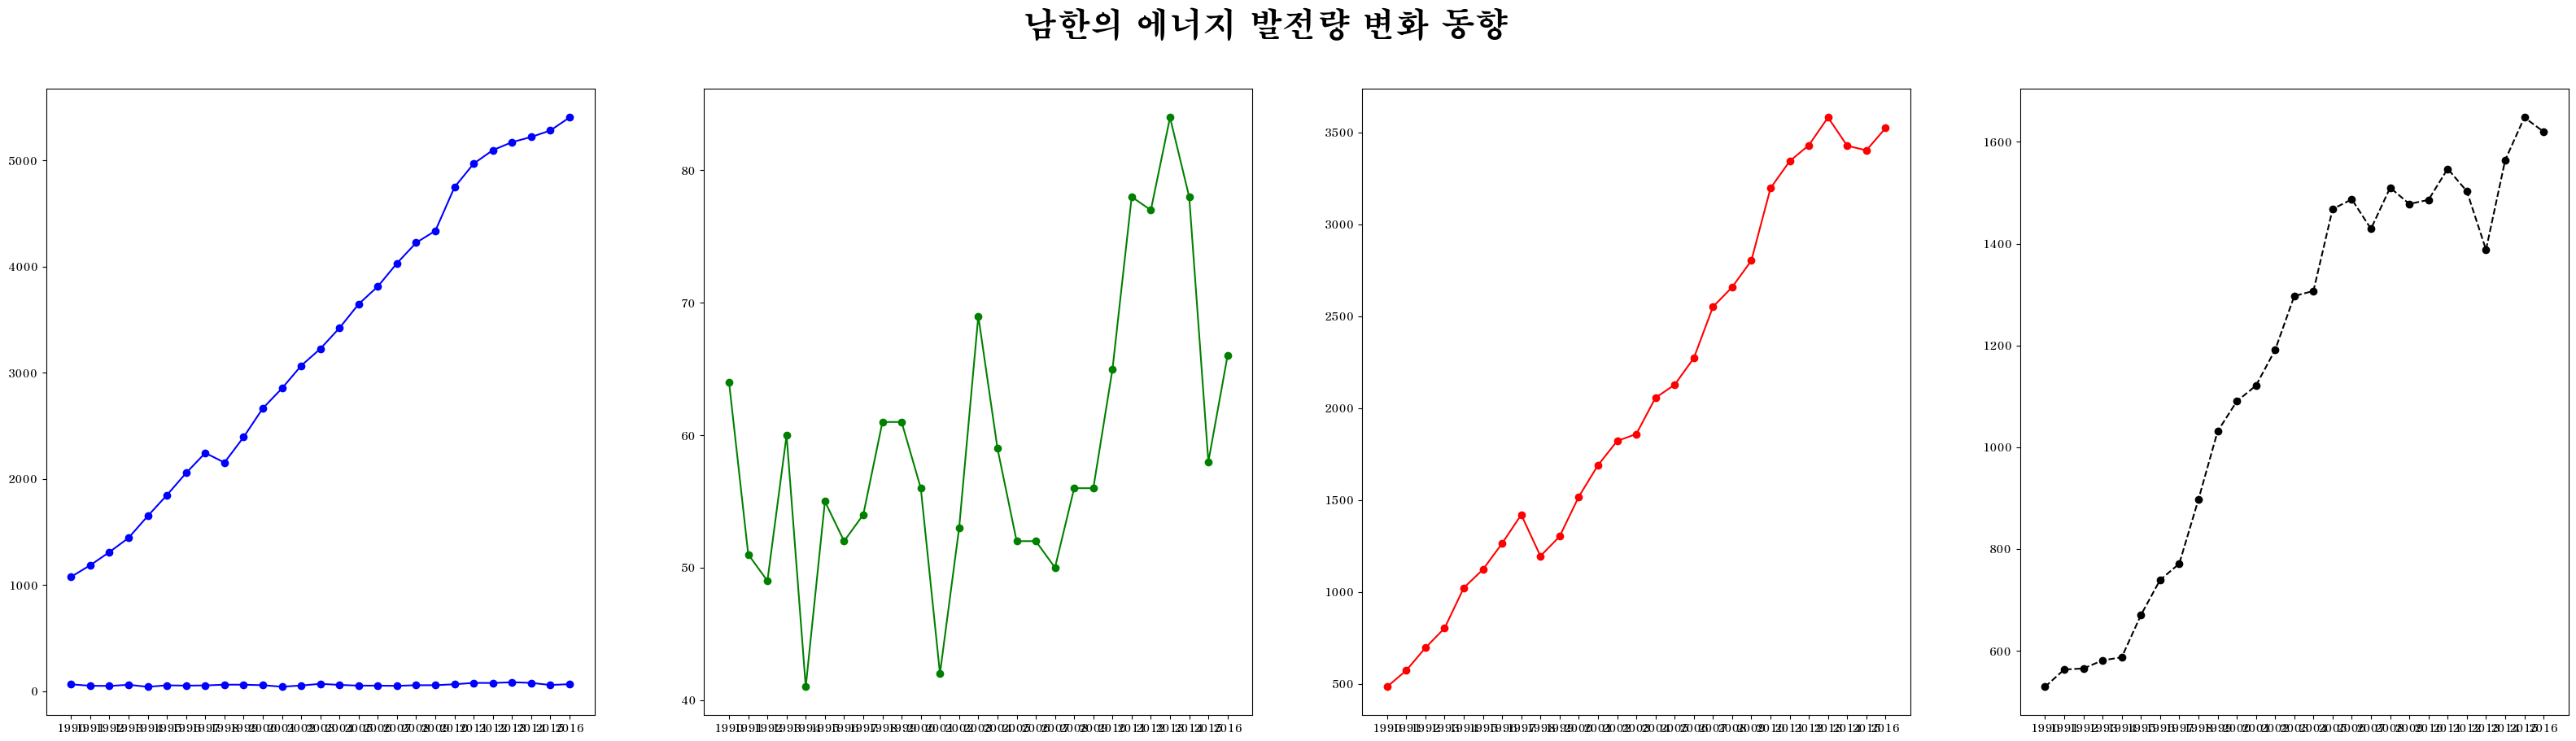

In [24]:
fig=plt.figure(figsize=(40,10))
axes=fig.subplots(1,4)
print(axes)

axes[0].plot(datadf.loc[('남한', '수력')],'bo-', label='남한 - 수력')
# for a in range(4):
#     axes[a].plot(datadf.loc[('남한', '수력')],'bo-', label='남한 - 수력')
datadf.index.to_list()[:4]
fmfs=['bo-','go-','ro-','ko--']

datas=datadf.index.to_list()[:4]
for idx, ax in enumerate(axes):
    ax.plot(datadf.loc[datas[idx]], fmfs[idx])

# 전체 창 figure 설정
fig.suptitle('남한의 에너지 발전량 변화 동향', fontsize=30)
